In [1]:
from rocketpy import Environment, Rocket, SolidMotor, Flight

In [2]:
Env = Environment(
    railLength=5.2,
    latitude=32.990254,
    longitude=10.974998,
    elevation=100,
    date=(2022, 9, 7, 12) # Tomorrow's date in year, month, day, hour UTC format
) 

Env.setAtmosphericModel(type='Forecast', file='GFS')


In [3]:
Pro75M1670 = SolidMotor(
    thrustSource="C:\\Users\\15124\\Downloads\\AeroTech_H73J.eng",
    burnOut=3.5207,
    grainNumber=5,
    grainSeparation=5/1000,
    grainDensity=1815,
    grainOuterRadius=33/1000,
    grainInitialInnerRadius=15/1000,
    grainInitialHeight=120/1000,
    nozzleRadius=33/1000,
    throatRadius=11/1000,
    interpolationMethod='linear'
)

In [4]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=0.03937,
    mass=1,
    inertiaI=0.002454,
    inertiaZ=0.002429,
    distanceRocketNozzle=-(35/1000),
    distanceRocketPropellant=-(17.5/1000),
    powerOffDrag="C:\\Users\\15124\\Desktop\\Test_Data\\engineoffdata.csv",
    powerOnDrag="C:\\Users\\15124\\Desktop\\Test_Data\\engineondata.csv"
)

Calisto.setRailButtons([0.2, -0.4])

NoseCone = Calisto.addNose(length=0.286, kind="vonKarman", distanceToCM=0.801)

FinSet = Calisto.addFins(4, span=0.073, rootChord=0.216, tipChord=0.031, distanceToCM=-0.585)

In [5]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 63.43 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -1.98 m/s
Lateral Surface Wind Speed: 1.20 m/s


 Rail Departure State

Rail Departure Time: 0.932 s
Rail Departure Velocity: 13.610 m/s
Rail Departure Static Margin: 4.395 c
Rail Departure Angle of Attack: 9.512°
Rail Departure Thrust-Weight Ratio: 3.391
Rail Departure Reynolds Number: 6.584e+04


BurnOut State

BurnOut time: 2.953 s
Altitude at burnOut: 88.731 m (AGL)
Rocket velocity at burnOut: 55.297 m/s
Freestream velocity at burnOut: 55.987 m/s
Mach Number at burnOut: 0.159
Kinetic energy at burnOut: 1.529e+03 J


Apogee

Apogee

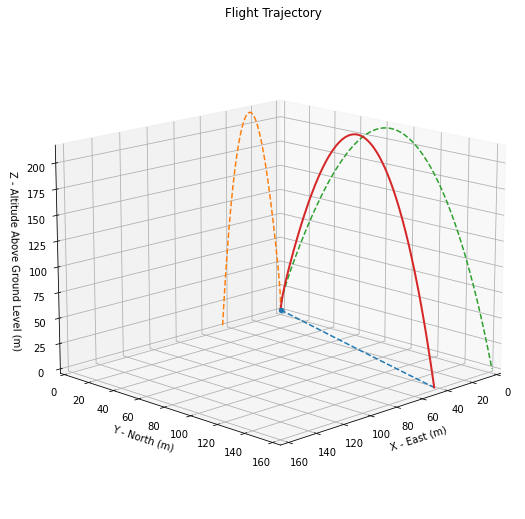



Trajectory Kinematic Plots



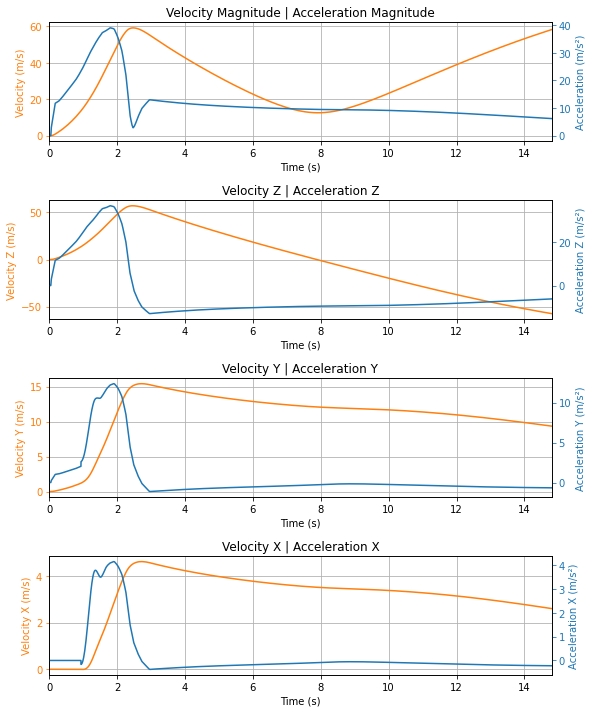



Angular Position Plots



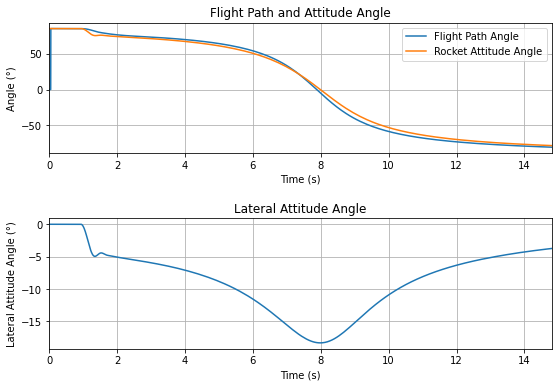



Path, Attitude and Lateral Attitude Angle plots



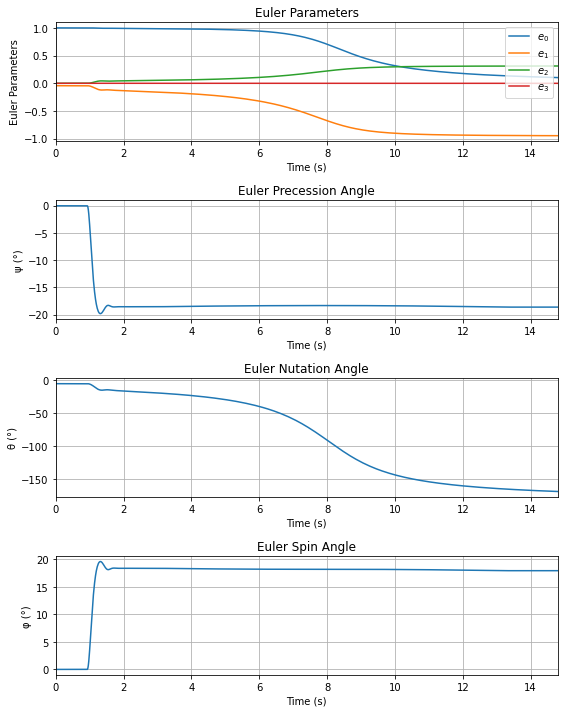



Trajectory Angular Velocity and Acceleration Plots



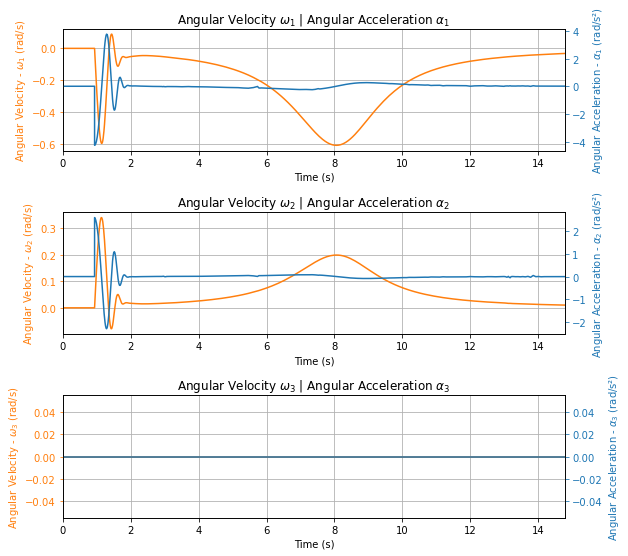



Trajectory Force Plots



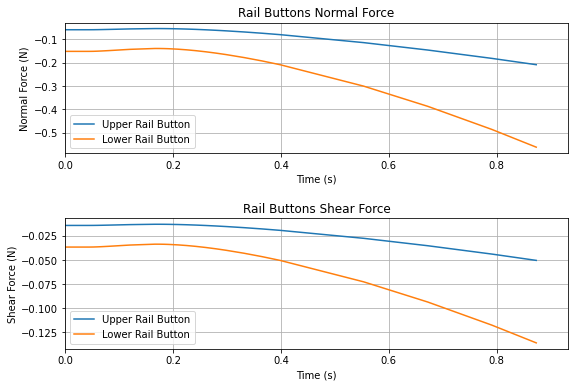

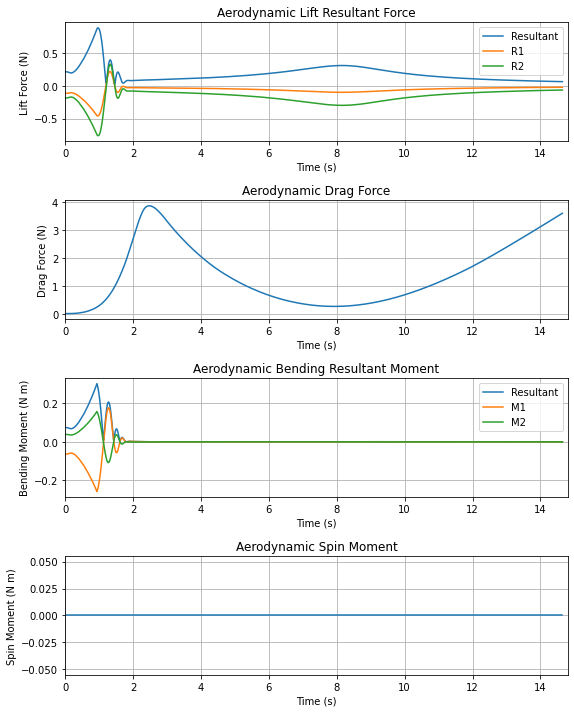



Trajectory Energy Plots



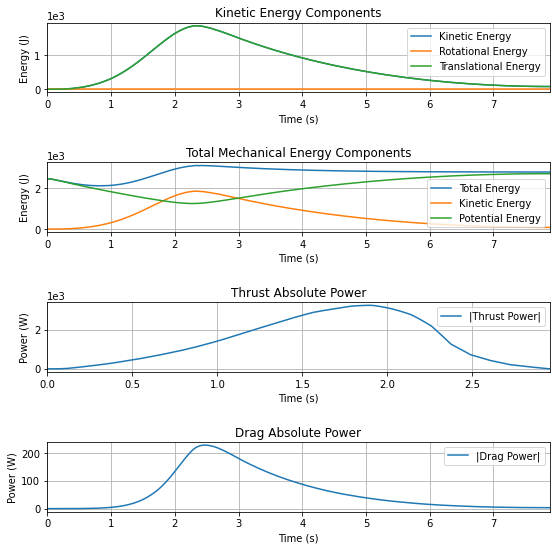



Trajectory Fluid Mechanics Plots



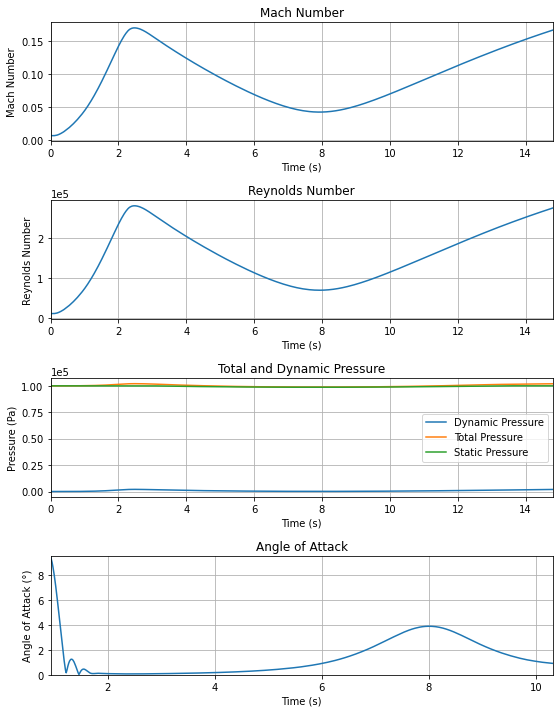



Trajectory Stability and Control Plots



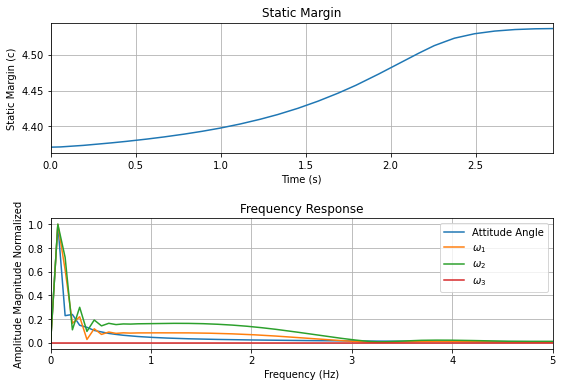

In [6]:
TestFlight.allInfo()

In [7]:
# CdS : float
#           used to compute the drag force exerted on the parachute by
#            the equation F = ((1/2)*rho*V^2)*CdS, that is, the drag
#            force is the dynamic pressure computed on the parachute
#            times its CdS coefficient. Has units of area and must be
#            given in squared meters.

In [8]:
desiredterminal = float(input('Enter desired landing velocity in m/s '))
mass = float(Calisto.mass)
d = Env.density(Env.elevation)
parachute_type = input("Enter parachute type (eg: 'toroidal' or 'custom') ")

if parachute_type == 'flat':
    dragcoeff = 0.8
elif parachute_type == 'toroidal':
    dragcoeff = 2.2
elif parachute_type == 'spherical':
    dragcoeff = 1.5
elif parachute_type == 'custom':
    dragcoeff = float(input('Enter custom drag coefficient '))
else:
    print('not a valid chute type, enter custom drag coefficient?')
    dragcoeff = float(input())


desiredCdS = (2*mass*9.81)/(d*(desiredterminal)**2)

area = desiredCdS / dragcoeff

radius = (area / 3.14)**(1/2)

print("Estimated required radius: {:.6f} meters".format(radius))

Enter desired landing velocity in m/s 10
Enter parachute type (eg: 'toroidal' or 'custom') flat
Estimated required radius: 0.263045 meters


In [9]:
#this is the funtion to use
def parachute_findradius_inputs():
    from numpy import pi
    desiredterminal = float(input('Enter desired landing velocity in m/s '))
    mass = Calisto.mass # change this so it takes the most recent rocket instance
    d = (Env.density(Env.elevation))

    parachute_type = input("Enter parachute type (eg: 'toroidal' or 'custom') ")

    if parachute_type == 'flat':
        dragcoeff = 0.8
    elif parachute_type == 'toroidal':
        dragcoeff = 2.2
    elif parachute_type == 'spherical':
        dragcoeff = 1.5
    elif parachute_type == 'custom':
        dragcoeff = float(input('Enter custom drag coefficient '))
    else:
        print('Not a valid chute type, enter custom drag coefficient?')
        dragcoeff = float(input())


    desiredCdS = (2*mass*9.81)/(d*(desiredterminal)**2)

    area = desiredCdS / dragcoeff

    radius = (area / pi)**(1/2)

    print("Estimated required radius: {:.6f} meters".format(radius))
    

In [10]:
parachute_findradius_inputs()

Enter desired landing velocity in m/s 10
Enter parachute type (eg: 'toroidal' or 'custom') flat
Estimated required radius: 0.262978 meters


In [11]:
def parachute_findradius_references():
    from numpy import pi
    desiredterminal = float(input('Enter desired landing velocity in m/s '))
    mass = Calisto.mass # change this so it takes the most recent rocket instance
    Env.calculateDensityProfile()
    d = Env.density(1)

    parachute_type = input("Enter parachute type (eg: 'toroidal' or 'custom') ")

    if parachute_type == 'flat':
        dragcoeff = 0.8
    elif parachute_type == 'toroidal':
        dragcoeff = 2.2
    elif parachute_type == 'spherical':
        dragcoeff = 1.5
    elif parachute_type == 'custom':
        dragcoeff = float(input('Enter custom drag coefficient '))
    else:
        print('Not a valid chute type, enter custom drag coefficient?')
        dragcoeff = float(input())


    desiredCdS = (2*mass*9.81)/(d*(desiredterminal)**2)

    area = desiredCdS / dragcoeff

    radius = (area / pi)**(1/2)

    print("Estimated required radius: {:.6f} meters".format(radius))
    

In [12]:
help(Environment)

Help on class Environment in module rocketpy.Environment:

class Environment(builtins.object)
 |  Environment(railLength, gravity=9.80665, date=None, latitude=0, longitude=0, elevation=0, datum='SIRGAS2000', timeZone='UTC')
 |  
 |  Keeps all environment information stored, such as wind and temperature
 |  conditions, as well as gravity and rail length.
 |  
 |  Attributes
 |  ----------
 |  
 |      Constants
 |      Environment.earthRadius : float
 |          Value of Earth's Radius = 6.3781e6 m.
 |      Environment.airGasConstant : float
 |          Value of Air's Gas Constant = 287.05287 J/K/Kg
 |  
 |      Gravity and Launch Rail Length:
 |      Environment.rl : float
 |          Launch rail length in meters.
 |      Environment.g : float
 |          Positive value of gravitational acceleration in m/s^2.
 |  
 |      Coordinates and Date:
 |      Environment.lat : float
 |          Launch site latitude.
 |      Environment.lon : float
 |          Launch site longitude.
 |      Env

In [16]:
#function that finds landing velocity as a function of parachute radius
def terminal_velocity (mass,d,dragcoeff,r):
    landingV = ((2*mass*9.81)/(d*(pi*(r**2)*dragcoeff))^(1/2))
                
    return None